In [1]:
import pickle
import pandas as pd
import glob
from tqdm import tqdm_notebook

In [2]:
allmols_virthits_list = glob.glob('/groups/cherkasvgrp/Student_backup/mkpandey/My_Projects/DDSgroups/Projects/DDS_AL_2M_2_dynamicVAL_mt1r_least_confidence_advanced_molformer_False_True/Regression/allmols_*.pkl')
all_molecules_list = []
for file in tqdm_notebook(allmols_virthits_list):
    with open(file,'rb') as f:
        (all_molecules, virtual_hits) = pickle.load(f)
    all_molecules_list.extend(all_molecules)
    # break

/tmp/ipykernel_565688/3877151540.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for file in tqdm_notebook(allmols_virthits_list):


  0%|          | 0/51 [00:00<?, ?it/s]

In [14]:
allmols_virthits_list = glob.glob('/groups/cherkasvgrp/Student_backup/mkpandey/My_Projects/DDSgroups/Projects/DDS_AL_2M_2_dynamicVAL_mpro_bald_advanced_molformer_False_True/Regression/allmols_*.pkl')
all_molecules_mpro_list = []
for file in tqdm_notebook(allmols_virthits_list):
    with open(file,'rb') as f:
        (all_molecules, virtual_hits) = pickle.load(f)
    all_molecules_mpro_list.extend(all_molecules)

/tmp/ipykernel_565688/1360803380.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for file in tqdm_notebook(allmols_virthits_list):


  0%|          | 0/51 [00:00<?, ?it/s]

In [13]:
len(all_molecules_mpro_list)

40376489

In [15]:
mol_df = pd.read_csv('/groups/cherkasvgrp/Student_backup/mkpandey/My_Projects/DDSgroups/data/lsd_dock_mt1r/40M_mols_w_dockscores.csv')
with open('/groups/cherkasvgrp/Student_backup/mkpandey/My_Projects/DDSgroups/data/lsd_dock_mpro/778M_mols_w_dockscores.pkl','rb') as f:
    mol_df_mpro = pickle.load(f)

In [16]:
threshold = -37.48 # -9.6
mol_df_mpro['labels'] = mol_df_mpro.mpro_dockscores<threshold
mol_df_mpro.head(2)

,smiles,zinc_id,mpro_dockscores,labels
4735375,CC[C@@H](C#N)C(=O)NC[C@@H](C)NC(=O)c1ccc(C(C)(...,ZINCnq000002ZH71,-20.69,False
2633486,CC[C@H](COC(F)(F)F)NC(=O)c1cccc([C@@]2(C)CCO2)c1,ZINCnD000007rCgx,-18.09,False


In [17]:
threshold = -33.28 # -9.6
mol_df['labels'] = mol_df.mt1r_dockscores<threshold
mol_df

,smiles,zinc_id,mt1r_dockscores,labels
0,COC(CN(CCCO)C(=O)c1csc(-c2cccs2)n1)OC,ZINC000187979531,-26.81,False
1,COc1ncc(Br)cc1CNCc1cncn1C(C)C,ZINC000623664602,-27.60,False
2,CCOC(=O)c1cc(NC(=O)N[C@H](C)C(F)F)cn1C,ZINC000602878587,-16.50,False
3,Cc1cnc(CN2C[C@H](C)S(=O)(=O)[C@@H](C)C2)o1,ZINC000289425160,-8.69,False
4,C[C@H]1CN(S(=O)(=O)Cc2cccc([N+](=O)[O-])c2)CCN...,ZINC000135101491,1.80,False
...,...,...,...,...
40376484,C[C@@H]1CCSCCN1CC(=O)NCCOc1ccc(F)cc1,ZINC000348184569,-8.34,False
40376485,CCOCCOCC(=O)N1CCCC[C@H]1[C@H](C)N,ZINC000236908211,-7.84,False
40376486,C[C@H](C(=O)NCc1nc(N(C)C)no1)c1cccnc1,ZINC000352105646,-25.82,False
40376487,O[C@H](c1cccc(C(F)(F)F)c1)C1CCNCC1,ZINC000036075375,-18.16,False


In [18]:
# import pandas as pd

# # Load ground truth dataframe
# ground_truth_df = mol_df  # Load your actual ground truth CSV

# # Convert predictions into a DataFrame
# predictions = all_molecules_list
# predictions_df = pd.DataFrame(predictions, columns=["zinc_id", "smiles", "pred_label", "pred_score"])

# # Merge predictions with ground truth
# merged_df = ground_truth_df.merge(predictions_df, on="zinc_id", how="inner")

# # Sort by predicted labels (assuming higher scores are better)
# merged_df = merged_df.sort_values(by="pred_label", ascending=False)
# merged_df

# # Compute enrichment
# top_n = int(0.01 * len(merged_df))  # Consider top 1% ranked molecules
# top_n_df = merged_df.iloc[:top_n]

# # Compute fractions
# total_true_fraction = merged_df["labels"].sum() / len(merged_df)
# top_true_fraction = top_n_df["labels"].sum() / top_n

# enrichment = top_true_fraction / total_true_fraction

# print(f"Enrichment Factor (EF1%): {enrichment:.2f}")


In [19]:
# # Define screening percentages
# import numpy as np
# from matplotlib import pyplot as plt

# percentages = np.linspace(0.01, 0.10, 10)  # 1% to 10%
# enrichment_values = []

# total_actives = merged_df["labels"].sum()  # Total number of positives in dataset

# for p in percentages:
#     top_n = int(p * len(merged_df))
#     top_n_df = merged_df.iloc[:top_n]
#     top_true_fraction = top_n_df["labels"].sum() / total_actives  # Fraction of actives retrieved
#     enrichment_values.append(top_true_fraction)

# # Plot the Enrichment Curve
# plt.figure(figsize=(8, 6))
# plt.plot(percentages * 100, enrichment_values, marker='o', linestyle='-', color='b', label="Enrichment Curve")
# plt.axhline(y=percentages[-1], linestyle="--", color="gray", label="Random Selection")
# plt.xlabel("Percentage of Dataset Screened (%)")
# plt.ylabel("Fraction of True Positives Retrieved")
# plt.title("Enrichment Plot")
# plt.legend()
# plt.grid(True)
# plt.show()

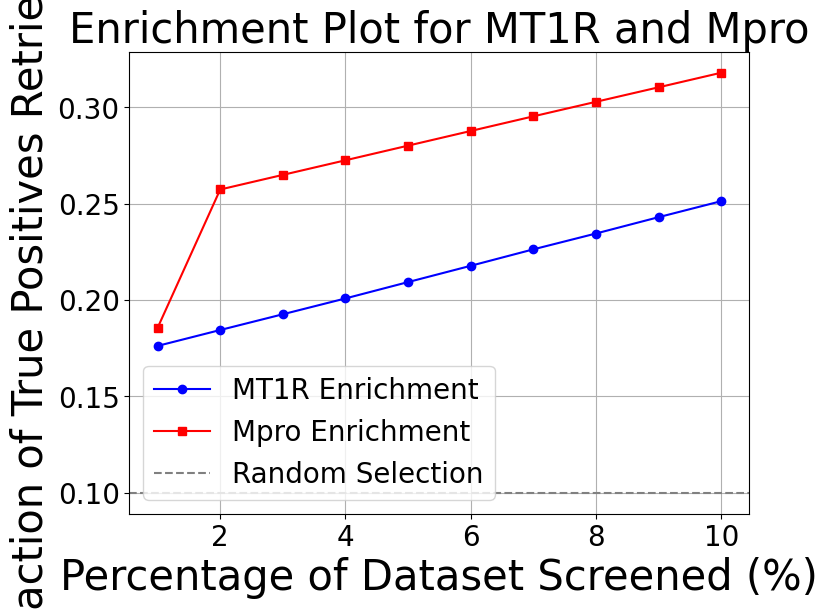

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load ground truth data
ground_truth_mt1r = mol_df  # MT1R dataset
ground_truth_mpro = mol_df_mpro  # Mpro dataset

# Convert predictions into DataFrames
predictions_mt1r = pd.DataFrame(all_molecules_list, columns=["zinc_id", "smiles", "pred_label", "pred_score"])
predictions_mpro = pd.DataFrame(all_molecules_mpro_list, columns=["zinc_id", "smiles", "pred_label", "pred_score"])

# Merge predictions with ground truth
merged_mt1r = ground_truth_mt1r.merge(predictions_mt1r, on="zinc_id", how="inner")
merged_mpro = ground_truth_mpro.merge(predictions_mpro, on="zinc_id", how="inner")

# Sort by predicted labels (assuming higher scores are better)
merged_mt1r = merged_mt1r.sort_values(by="pred_label", ascending=False)
merged_mpro = merged_mpro.sort_values(by="pred_label", ascending=False)

# Define screening percentages
percentages = np.linspace(0.01, 0.10, 10)  # 1% to 10%

# Function to compute enrichment values
def compute_enrichment(merged_df, percentages):
    enrichment_values = []
    total_actives = merged_df["labels"].sum()  # Total number of positives in dataset

    for p in percentages:
        top_n = int(p * len(merged_df))
        top_n_df = merged_df.iloc[:top_n]
        top_true_fraction = top_n_df["labels"].sum() / total_actives  # Fraction of actives retrieved
        enrichment_values.append(top_true_fraction)

    return enrichment_values

# Compute enrichment values for both datasets
enrichment_mt1r = compute_enrichment(merged_mt1r, percentages)
enrichment_mpro = compute_enrichment(merged_mpro, percentages)

# Plot Enrichment Curves for MT1R and Mpro
plt.figure(figsize=(8, 6))
plt.plot(percentages * 100, enrichment_mt1r, marker='o', linestyle='-', color='b', label="MT1R Enrichment")
plt.plot(percentages * 100, enrichment_mpro, marker='s', linestyle='-', color='r', label="Mpro Enrichment")
plt.axhline(y=percentages[-1], linestyle="--", color="gray", label="Random Selection")
plt.xlabel("Percentage of Dataset Screened (%)", fontsize=30)
plt.ylabel("Fraction of True Positives Retrieved", fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Enrichment Plot for MT1R and Mpro", fontsize=30)
plt.legend(fontsize=20)
plt.grid(True)
plt.show()


In [ ]:
merged_mt1r.drop(columns=['smiles_y'], inplace=True)
with open('merged_mt1r.pkl','wb') as f:
    pickle.dump(merged_mt1r,f)
    
merged_mpro.drop(columns=['smiles_y'], inplace=True)
with open('merged_mpro.pkl','wb') as f:
    pickle.dump(merged_mpro,f)

: 

In [12]:
predictions_mpro

,zinc_id,smiles,pred_label,pred_score
0,ZINC000568284286,C[C@@H](CC(=O)O)N(C)C(=O)CCc1cccc(F)c1F,0,0.000128
1,ZINC000287720060,CC(C)[C@H](NC(=O)Nc1ccc2nccnc2c1Br)C(N)=O,0,0.000017
2,ZINC000598945259,O=C(Cn1cc([N+](=O)[O-])ccc1=O)N[C@H]1Cc2cncn2C1,0,0.010111
3,ZINC000220233407,CC[C@H]1CN(Cc2cnn(C(C)C)c2)CC[C@@H]1N,0,0.000015
4,ZINC000444210020,N#Cc1cc(F)c(S(=O)(=O)N[C@@H]2CNC(=O)C2)c(F)c1,0,0.000023
...,...,...,...,...
40376484,ZINC000066206703,CSc1ccc(NC(=O)C(=O)NC2CCN(C(C)C)CC2)cn1,0,0.000016
40376485,ZINC000328271280,CC[C@H]1CC[C@H](C(=O)N2CCC(=O)[C@@H](C)C2)CC1,0,0.000015
40376486,ZINC000346768215,CCN1C[C@H](C)N(C(=O)c2ccc([N+](=O)[O-])c3cccnc...,0,0.000021
40376487,ZINC000663490762,O=C(c1ncccc1C(F)(F)F)N1CCOC2(CNC2)C1,0,0.000013


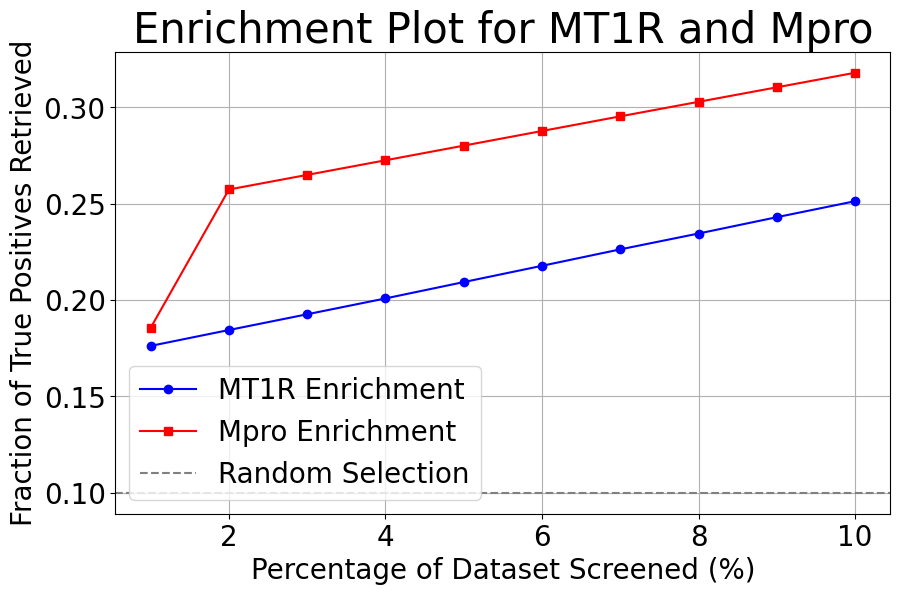

In [ ]:
# Plot Enrichment Curves for MT1R and Mpro
plt.figure(figsize=(10, 6))
plt.plot(percentages * 100, enrichment_mt1r, marker='o', linestyle='-', color='b', label="MT1R Enrichment")
plt.plot(percentages * 100, enrichment_mpro, marker='s', linestyle='-', color='r', label="Mpro Enrichment")
plt.axhline(y=percentages[-1], linestyle="--", color="gray", label="Random Selection")
plt.xlabel("Percentage of Dataset Screened (%)", fontsize=20)
plt.ylabel("Fraction of True Positives Retrieved", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Enrichment Plot for MT1R and Mpro", fontsize=30)
plt.legend(fontsize=20)
plt.grid(True)
plt.savefig('enrichment_plot.png', dpi=350)
plt.show()

In [ ]:
merged_df.drop(columns=['smiles_y'], inplace=True)
# with open('/groups/cherkasvgrp/Student_backup/mkpandey/My_Projects/DDSgroups/Projects/DDS_AL_2M_2_dynamicVAL_mpro_bald_advanced_molformer_False_True/Regression/merged_df.pkl','wb') as f:
#     pickle.dump(merged_df,f)

KeyError: "['smiles_y'] not found in axis"

In [ ]:
# Get random selection as test set and plot AUC roc curve
from sklearn.metrics import roc_curve, roc_auc_score  

# Regression by sampling 250K getting top-1% of molecules from predicted labels and plot scatter plot 

In [ ]:
pred_active_mols_250K_df = merged_df[merged_df.pred_label==1].sample(frac=1, random_state=42).head(50000)
pred_active_mols_250K_df

,smiles_x,zinc_id,mpro_dockscores,labels,pred_label
677402839,C[C@H]1CN(C(=O)CCn2ccnc2)C[C@@H]1Nc1ncnc2c1CCCC2,ZINCqp00000k7vOr,-41.70,True,1
672113497,Cc1ccc(Br)cc1C[S@@](=O)[C@H](C)c1nncn1C,ZINCjy000003qTmg,-18.26,False,1
500602140,CC(C)N(C(=O)C[C@@H](C)c1ccncc1)C1CCOCC1,ZINClz0000020vVC,-32.09,False,1
547294787,COCCN(CCc1ccncc1)C(=O)Cc1ccc(F)c(Cl)c1,ZINCoB000005aV1R,-36.12,False,1
39774269,Cc1cc(C(=O)N(C)CCN=c2[nH]c3ccccc3o2)[nH]c1C,ZINCnz000003FDm7,-31.03,False,1
...,...,...,...,...,...
729468009,COC1(C(F)(F)CN=c2nc3sccc3c(N)[nH]2)CCCCC1,ZINCnG000002jK1k,-21.35,False,1
138640235,Cc1cnc(F)c(NC(=O)NCc2ccc(=N)[nH]c2)c1,ZINCko0000063Z5l,-30.93,False,1
639201951,CCc1c[nH]nc1CNC(=O)c1cccc(CCl)c1,ZINCjw000003aStI,-39.39,True,1
351210310,O=C(N[C@H]1CCCC[C@@H]1NC(=O)[C@@H]1CCc2nnc(O)n...,ZINCsn00000gk4lM,-32.19,False,1


In [ ]:
# # save pred_active_mols_250K_df and create and save top1pct
# true_top1pct_df = merged_df[merged_df.mpro_dockscores<=threshold]
# true_top1pct_df
# with open('/groups/cherkasvgrp/Student_backup/mkpandey/My_Projects/DDSgroups/Projects/DDS_AL_2M_2_dynamicVAL_mpro_bald_advanced_molformer_False_True/Regression/pred_active_mols_100K_df.pkl','wb') as f:
#     pickle.dump(pred_active_mols_250K_df,f)

# with open('/groups/cherkasvgrp/Student_backup/mkpandey/My_Projects/DDSgroups/Projects/DDS_AL_2M_2_dynamicVAL_mpro_bald_advanced_molformer_False_True/Regression/true_top1pct_df.pkl','wb') as f:
#     pickle.dump(true_top1pct_df,f)
    
with open('/groups/cherkasvgrp/Student_backup/mkpandey/My_Projects/DDSgroups/Projects/DDS_AL_2M_2_dynamicVAL_mpro_bald_advanced_molformer_False_True/Regression/pred_active_mols_100K_df.pkl','rb') as f:
    pred_active_mols_250K_df = pickle.load(f)

with open('/groups/cherkasvgrp/Student_backup/mkpandey/My_Projects/DDSgroups/Projects/DDS_AL_2M_2_dynamicVAL_mpro_bald_advanced_molformer_False_True/Regression/true_top1pct_df.pkl','rb') as f:
    true_top1pct_df = pickle.load(f)

In [ ]:
pred_active_mols_250K_df['len'] = pred_active_mols_250K_df.smiles_x.apply(lambda x: len(x))
pred_active_mols_250K_df.len.describe()

count    100000.000000
mean         41.319480
std           7.644844
min          22.000000
25%          36.000000
50%          41.000000
75%          46.000000
max          88.000000
Name: len, dtype: float64

<Axes: >

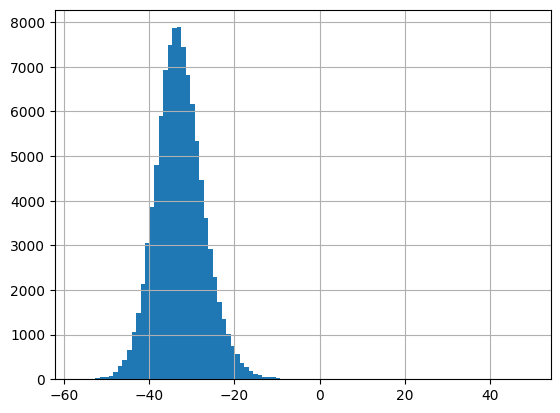

In [ ]:
pred_active_mols_250K_df.mpro_dockscores.hist(bins=100)

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from transformers import AutoTokenizer, AutoModel
from torch.utils.data import Dataset, DataLoader, random_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tqdm import tqdm

In [ ]:
class SMILESDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_length=100):
        self.data = dataframe
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        smiles = row["smiles_x"]  # Use the correct column containing SMILES
        docking_score = row["mpro_dockscores"]  # True docking score

        encoding = self.tokenizer(
            smiles,
            padding="max_length",
            truncation=True,
            max_length=self.max_length,
            return_tensors="pt",
        )

        return {
            "input_ids": encoding["input_ids"].squeeze(0),
            "attention_mask": encoding["attention_mask"].squeeze(0),
            "docking_score": torch.tensor(docking_score, dtype=torch.float),
        }


In [ ]:
class AdvancedMoLFormerRegression(nn.Module):
    def __init__(self, dropout_rate=0.1, num_dense_layers=3):
        super(AdvancedMoLFormerRegression, self).__init__()
        smiles_model = "ibm/MoLFormer-XL-both-10pct"

        self.tokenizer = AutoTokenizer.from_pretrained(smiles_model, trust_remote_code=True)
        self.base_model = AutoModel.from_pretrained(smiles_model, deterministic_eval=True, trust_remote_code=True)

        hidden_dim = self.base_model.config.hidden_size
        intermediate_dim = 10 * hidden_dim

        self.attention_layer = nn.Linear(hidden_dim, 1)

        self.dense_layers = nn.ModuleList([
            nn.Linear(hidden_dim + i * hidden_dim, hidden_dim) for i in range(num_dense_layers)
        ])

        concatenated_size = hidden_dim * (1 + num_dense_layers)
        self.project_dense = nn.Linear(concatenated_size, hidden_dim)

        self.multihead_attention = nn.MultiheadAttention(
            embed_dim=hidden_dim, num_heads=8, dropout=dropout_rate, batch_first=True
        )

        self.residual_blocks = nn.Sequential(
            self._create_residual_block(hidden_dim, intermediate_dim, dropout_rate),
            self._create_residual_block(hidden_dim, intermediate_dim, dropout_rate),
            self._create_residual_block(hidden_dim, intermediate_dim, dropout_rate),
            self._create_residual_block(hidden_dim, intermediate_dim, dropout_rate),
            self._create_residual_block(hidden_dim, intermediate_dim, dropout_rate),
            self._create_residual_block(hidden_dim, intermediate_dim, dropout_rate),
        )

        self.fc1 = nn.Linear(hidden_dim, intermediate_dim)
        self.norm1 = nn.LayerNorm(intermediate_dim)
        self.fc2 = nn.Linear(intermediate_dim, hidden_dim)
        self.norm2 = nn.LayerNorm(hidden_dim)

        self.dropout = nn.Dropout(p=dropout_rate)
        self.output_layer = nn.Linear(hidden_dim, 1)  # Single output for regression

    def _create_residual_block(self, input_dim, output_dim, dropout_rate):
        return nn.Sequential(
            nn.Linear(input_dim, output_dim),
            nn.LayerNorm(output_dim),
            nn.PReLU(),
            nn.Dropout(p=dropout_rate),
            nn.Linear(output_dim, input_dim),
            nn.LayerNorm(input_dim),
            nn.PReLU(),
        )

    def forward(self, input_ids, attention_mask):
        base_outputs = self.base_model(input_ids, attention_mask=attention_mask).last_hidden_state
        attention_weights = torch.softmax(self.attention_layer(base_outputs), dim=1)
        pooled_output = torch.sum(attention_weights * base_outputs, dim=1)

        dense_out = pooled_output
        for dense_layer in self.dense_layers:
            dense_out = torch.cat([dense_out, dense_layer(dense_out)], dim=1)

        dense_out = self.project_dense(dense_out)

        attention_out, _ = self.multihead_attention(
            dense_out.unsqueeze(1), dense_out.unsqueeze(1), dense_out.unsqueeze(1)
        )

        attention_out = attention_out.squeeze(1)
        x = self.residual_blocks(attention_out)

        x = self.norm1(torch.relu(self.fc1(x)))
        x = self.norm2(torch.relu(self.fc2(x)))

        x = self.dropout(x)
        regression_output = self.output_layer(x)

        return regression_output.squeeze()


In [ ]:
class OverparamMoLFormerRegression(nn.Module):
    def __init__(self, dropout_rate=0.1, num_dense_layers=6, num_residual_blocks=10, num_attention_layers=3):
        super(OverparamMoLFormerRegression, self).__init__()
        smiles_model = "ibm/MoLFormer-XL-both-10pct"

        self.tokenizer = AutoTokenizer.from_pretrained(smiles_model, trust_remote_code=True)
        self.base_model = AutoModel.from_pretrained(smiles_model, deterministic_eval=True, trust_remote_code=True)

        hidden_dim = self.base_model.config.hidden_size
        intermediate_dim = 20 * hidden_dim  # Increased intermediate layer size

        # Multi-layer attention pooling
        self.attention_layers = nn.ModuleList([
            nn.Linear(hidden_dim, 1) for _ in range(num_attention_layers)
        ])

        # Deep Dense Layers (Overparameterization)
        self.dense_layers = nn.ModuleList([
            nn.Linear(hidden_dim*num_attention_layers + i * hidden_dim, hidden_dim) for i in range(num_dense_layers)
        ])

        concatenated_size = hidden_dim * num_attention_layers + (hidden_dim * num_dense_layers)
        self.project_dense = nn.Linear(concatenated_size, hidden_dim)

        # Multihead Attention Layers (Stacked for overparameterization)
        self.multihead_attention_layers = nn.ModuleList([
            nn.MultiheadAttention(embed_dim=hidden_dim, num_heads=16, dropout=dropout_rate, batch_first=True)
            for _ in range(num_attention_layers)
        ])

        # Deep Residual Blocks
        self.residual_blocks = nn.Sequential(*[
            self._create_residual_block(hidden_dim, intermediate_dim, dropout_rate)
            for _ in range(num_residual_blocks)
        ])

        # Fully connected overparameterized layers
        self.fc1 = nn.Linear(hidden_dim, intermediate_dim)
        self.norm1 = nn.LayerNorm(intermediate_dim)
        self.fc2 = nn.Linear(intermediate_dim, intermediate_dim // 2)
        self.norm2 = nn.LayerNorm(intermediate_dim // 2)
        self.fc3 = nn.Linear(intermediate_dim // 2, hidden_dim)  # Additional FC layer

        self.dropout = nn.Dropout(p=dropout_rate)
        self.output_layer = nn.Linear(hidden_dim, 1)  # Regression output

    def _create_residual_block(self, input_dim, output_dim, dropout_rate):
        """Creates a deep residual block with overparameterization"""
        return nn.Sequential(
            nn.Linear(input_dim, output_dim),
            nn.LayerNorm(output_dim),
            nn.PReLU(),
            nn.Dropout(p=dropout_rate),
            nn.Linear(output_dim, input_dim),
            nn.LayerNorm(input_dim),
            nn.PReLU(),
        )

    def forward(self, input_ids, attention_mask):
        base_outputs = self.base_model(input_ids, attention_mask=attention_mask).last_hidden_state

        # Multi-layer attention pooling
        # pooled_output = base_outputs
        pooled_outputs = []
        for i, attn_layer in enumerate(self.attention_layers):
            # print('tryng attn layer base output', base_outputs.shape)
            # print('attn layer opt ', attn_layer(base_outputs).shape)
            # print(i)
            attention_weights = torch.softmax(attn_layer(base_outputs), dim=1)
            pooled_output = torch.sum(attention_weights * base_outputs, dim=1)
            pooled_outputs.append(pooled_output)
            # print('pooled_output', pooled_output.shape)

        
        # Concatenate pooled outputs across all attention layers
        pooled_output = torch.cat(pooled_outputs, dim=1)  # Ensures shape consistency

        # Deep dense connections
        dense_out = pooled_output
        # print('dense out shape ',dense_out.shape)
        for dense_layer in self.dense_layers:
            dense_out = torch.cat([dense_out, dense_layer(dense_out)], dim=1)
            # print('dense out ', dense_out.shape)

        dense_out = self.project_dense(dense_out)

        # Stacked Multihead Attention
        attention_out = dense_out.unsqueeze(1)
        for attn_layer in self.multihead_attention_layers:
            attention_out, _ = attn_layer(attention_out, attention_out, attention_out)

        attention_out = attention_out.squeeze(1)

        # Deep Residual Blocks
        x = self.residual_blocks(attention_out)
        # print('x ', x.shape)
        # Overparameterized Fully Connected Layers
        x = self.norm1(torch.relu(self.fc1(x)))
        x = self.norm2(torch.relu(self.fc2(x)))
        x = torch.relu(self.fc3(x))  # Extra FC layer

        x = self.dropout(x)
        regression_output = self.output_layer(x)

        return regression_output.squeeze()

In [ ]:
# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained("ibm/MoLFormer-XL-both-10pct", trust_remote_code=True)

# Split dataset into train (80%), validation (10%), and test (10%)
train_df, temp_df = train_test_split(pred_active_mols_250K_df, test_size=0.2, random_state=42)  # 80% train
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)  # 10% val, 10% test

# Create dataset objects
train_dataset = SMILESDataset(train_df, tokenizer)
val_dataset = SMILESDataset(val_df, tokenizer)
test_dataset = SMILESDataset(test_df, tokenizer)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

In [ ]:
import copy

def train_molformer_regression(model, train_loader, val_loader, num_epochs=50, lr=1e-4, patience=9):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    criterion = nn.MSELoss()  # Mean Squared Error for regression
    optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=0.01)
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=15, eta_min=1e-8)

    best_val_loss = float("inf")
    early_stop_counter = 0
    best_model_state = None
    
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0

        for batch in tqdm(train_loader, desc=f"Training Epoch {epoch + 1}/{num_epochs}"):
            optimizer.zero_grad()
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            docking_scores = batch["docking_score"].to(device)

            outputs = model(input_ids, attention_mask)
            loss = criterion(outputs, docking_scores)

            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        train_loss /= len(train_loader)

        model.eval()
        val_loss = 0
        with torch.no_grad():
            for batch in val_loader:
                input_ids = batch["input_ids"].to(device)
                attention_mask = batch["attention_mask"].to(device)
                docking_scores = batch["docking_score"].to(device)

                outputs = model(input_ids, attention_mask)
                loss = criterion(outputs, docking_scores)
                val_loss += loss.item()

        val_loss /= len(val_loader)
        
        avg_val_loss = val_loss
        # scheduler.step(avg_val_loss)
        print(f"Epoch {epoch+1}: Train Loss = {train_loss:.4f}, Val Loss = {val_loss:.4f}")

        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            best_model_state = copy.deepcopy(model.state_dict())
            early_stop_counter = 0
            print(f"New best validation loss: {best_val_loss:.4f}")
        else:
            early_stop_counter += 1
            print(f"No improvement in validation loss for {early_stop_counter} consecutive epochs.")

        if early_stop_counter >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}. Best epoch was {epoch-early_stop_counter+1}.")
            break
        
    model.load_state_dict(best_model_state)
    return model
        
        # if val_loss < best_val_loss:
        #     best_val_loss = val_loss
        #     torch.save(model.state_dict(), "best_molformer_regression.pt")
        #     print("Best model saved.")

model = train_molformer_regression(OverparamMoLFormerRegression(num_dense_layers=10, dropout_rate=0.5), train_loader, val_loader, lr = 1e-3, patience=3)


Training Epoch 1/50: 100%|██████████| 2500/2500 [06:09<00:00,  6.76it/s]


Epoch 1: Train Loss = 45.5024, Val Loss = 35.3226
New best validation loss: 35.3226


Training Epoch 2/50:   0%|          | 0/2500 [00:00<?, ?it/s]


OutOfMemoryError: CUDA out of memory. Tried to allocate 46.00 MiB. GPU 0 has a total capacity of 39.38 GiB of which 39.81 MiB is free. Process 2159305 has 20.79 GiB memory in use. Including non-PyTorch memory, this process has 18.54 GiB memory in use. Of the allocated memory 17.43 GiB is allocated by PyTorch, and 596.51 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

: 

/tmp/ipykernel_741275/3367788240.py:29: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, _ = pearsonr(true_scores, pred_scores)
/tmp/ipykernel_741275/3367788240.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


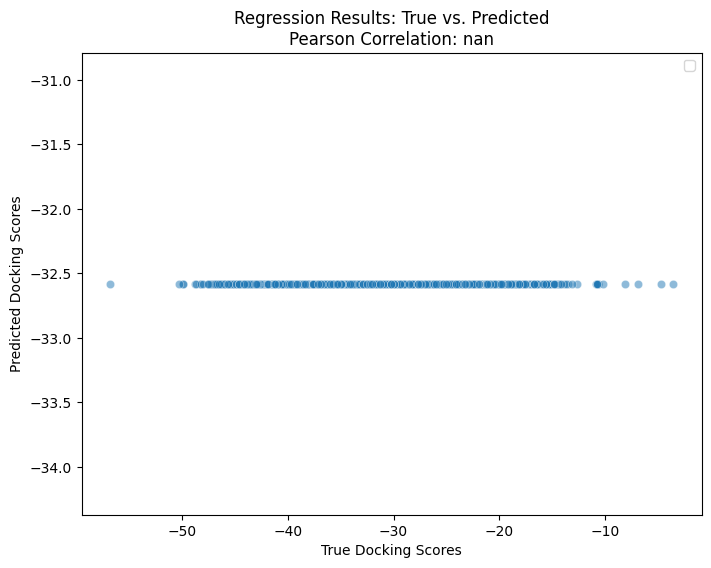

Pearson Correlation Coefficient: nan


In [ ]:
from scipy.stats import pearsonr

def plot_predictions(model, val_loader):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    model.eval()

    true_scores, pred_scores = [], []

    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            docking_scores = batch["docking_score"].cpu().numpy()

            outputs = model(input_ids, attention_mask).cpu().numpy()

            true_scores.extend(docking_scores)
            pred_scores.extend(outputs)

    # Convert to NumPy arrays
    true_scores = np.array(true_scores)
    pred_scores = np.array(pred_scores).flatten()
    pred_scores = np.round(pred_scores, 2)

    # print(true_scores, pred_scores)

    # Compute Pearson correlation coefficient
    correlation, _ = pearsonr(true_scores, pred_scores)

    # Plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=true_scores, y=pred_scores, alpha=0.5)
    plt.xlabel("True Docking Scores")
    plt.ylabel("Predicted Docking Scores")
    plt.title(f"Regression Results: True vs. Predicted\nPearson Correlation: {correlation:.4f}")
    
    # Draw diagonal line
    min_val = min(true_scores.min(), pred_scores.min())
    max_val = max(true_scores.max(), pred_scores.max())
    # plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label="Perfect Prediction")

    plt.legend()
    plt.show()

    print(f"Pearson Correlation Coefficient: {correlation:.4f}")

# Call the function after training
plot_predictions(model, val_loader)


In [ ]:
pred_scores[0]

-32.659695

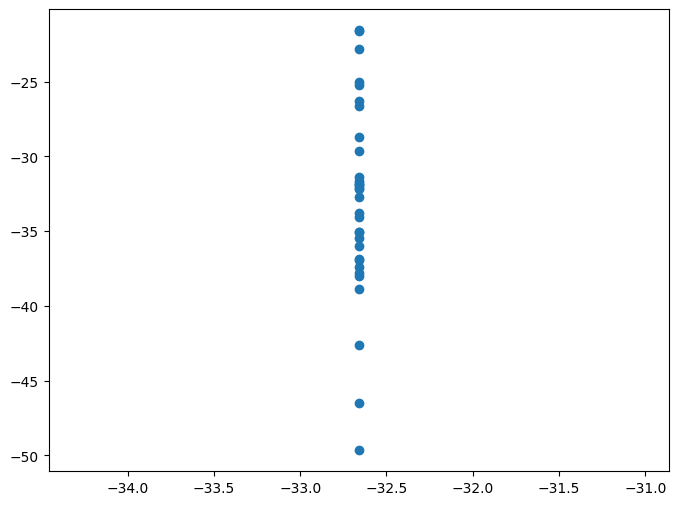

In [ ]:
true_scores = [
    -22.85, -37.78, -36.89, -26.65, -31.91, -21.6, -33.8, -32.1, -46.5, -32.16,
    -31.62, -42.65, -38.87, -32.7, -31.94, -34.07, -36.94, -35.45, -25.01, -28.74,
    -37.42, -35.07, -26.27, -49.66, -35.06, -25.21, -35.98, -29.62, -31.41, -38.0,
    -21.57, -31.78
]

pred_scores = [
    -32.659695, -32.659695, -32.659695, -32.659695, -32.659695, -32.659695,
    -32.6597, -32.6597, -32.659695, -32.659695, -32.659695, -32.659695,
    -32.659695, -32.659695, -32.659695, -32.659695, -32.659695, -32.659695,
    -32.659695, -32.659695, -32.659695, -32.659695, -32.659695, -32.659695,
    -32.659695, -32.659695, -32.659695, -32.659695, -32.659695, -32.659695,
    -32.659695, -32.659695
]
pred_scores = np.round(pred_scores, 2)
# true_scores, pred_scores = [-35,-50], [-32,-32]
plt.figure(figsize=(8, 6))
plt.scatter(pred_scores, true_scores) #(true_scores, pred_scores)
plt.show()

In [ ]:
device = torch.device('cuda')
for batch in tqdm(val_loader):
    input_ids = batch["input_ids"].to(device)
    attention_mask = batch["attention_mask"].to(device)
    docking_scores = batch["docking_score"].to(device)

    outputs = model(input_ids, attention_mask)
    print(docking_scores, outputs)
    break

  0%|          | 0/79 [00:00<?, ?it/s]

tensor([-22.8500, -37.7800, -36.8900, -26.6500, -31.9100, -21.6000, -33.8000,
        -32.1000, -46.5000, -32.1600, -31.6200, -42.6500, -38.8700, -32.7000,
        -31.9400, -34.0700, -36.9400, -35.4500, -25.0100, -28.7400, -37.4200,
        -35.0700, -26.2700, -49.6600, -35.0600, -25.2100, -35.9800, -29.6200,
        -31.4100, -38.0000, -21.5700, -31.7800, -28.7200, -31.5300, -40.1500,
        -38.1200, -32.8100, -26.2100, -33.8600, -40.8000, -35.5200, -34.1000,
        -41.4200, -29.8100, -42.9300, -27.0100, -30.9600, -44.9200, -35.6000,
        -32.2500, -34.4700, -36.0500, -32.3500, -31.6800, -36.3500, -31.4400,
        -34.3000, -43.7100, -29.0200, -31.3600, -33.0600, -39.6300, -27.2300,
        -28.6200, -38.9100, -35.4000, -18.4800, -33.4900, -24.6100, -28.2600,
        -34.7600, -42.2200, -38.5500, -33.9100, -27.2900, -44.8600, -36.6000,
        -29.3200, -37.3200, -27.9300, -32.1800, -34.9300, -31.6200, -27.5400,
        -32.8100, -36.0500, -32.2500, -34.4100, -20.4000, -36.27

# Pearson on true top1% mols in dataset


In [ ]:

true_top1pct_df

,zinc_id,smiles,indices,jak2_dockscores,labels
3,s_11____18313630____54601,CC1=CC=C2N=C(C3=CC=CC=C3)C=C(C(=O)NC3=NN(C)C(=...,"b""\x9d\x00\x00\x00\xeb\x00\x00\x00\xf9\x00\x00...",-10.7,True
17,s_2708____5349540____14653194,CCC(NC(=O)N1CCC2(CC1)C(=O)NCN2C)C1=CC=C(F)C=C1F,"b""\x01\x00\x00\x00P\x00\x00\x00k\x00\x00\x00u\...",-9.7,True
250,s_22____12793848____21290998,CN1C=CC(NC2=CC=CC=C2NC(=O)C2=C3C=CNC3=CC(C(F)(...,"b""`\x00\x00\x00r\x00\x00\x00w\x00\x00\x00\x03\...",-10.4,True
426,m_276010____17281866____24766394____24752070,CC1=CC=C(CN2C=C(C3=CC=CC(N4CCN(C(=O)C5=NC=C([N...,"b""P\x00\x00\x00\xc0\x00\x00\x00\xee\x00\x00\x0...",-9.6,False
752,s_22____14577504____24595984,O=C(NC1=C2C(O)=CC=CC2=CC=C1)C1CCC2(CCNC2=O)CC1,"b""1\x01\x00\x00:\x01\x00\x00\x8a\x02\x00\x00\x...",-10.2,True
...,...,...,...,...,...
1850801,s_271570____19608590____14390082,COC(=O)C1=CC=C2C=C(C3=C(C)C=CC4=NSN=C34)C=CC2=C1,"b""z\x00\x00\x00\x91\x00\x00\x00\xcb\x00\x00\x0...",-10.1,True
1850844,m_280190____22877816____18083558____19344434,CC1=CC=C(CN2C=C(C3=CC(C(=O)N[C@@H]4CCC[C@@H](C...,"b""P\x00\x00\x00\xc0\x00\x00\x00\xeb\x00\x00\x0...",-9.6,False
1851033,m_275592____15865472____15843880____15857394,O=C(NC1CN(C(=O)C2=CC(Cl)=NNC2=O)CC2(CCC2)C1)C1...,"b""\t\x00\x00\x00J\x00\x00\x00a\x00\x00\x00h\x0...",-9.7,True
1851176,s_22____8627552____21060586,CCC1=CC(NC(=O)C2=NC=CN=C2C(=O)NC2=CC=C(F)C=C2)...,"b""P\x00\x00\x00Z\x00\x00\x00\xa0\x00\x00\x00\x...",-10.0,True


(17422, 7)


/tmp/ipykernel_4149050/3738087962.py:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


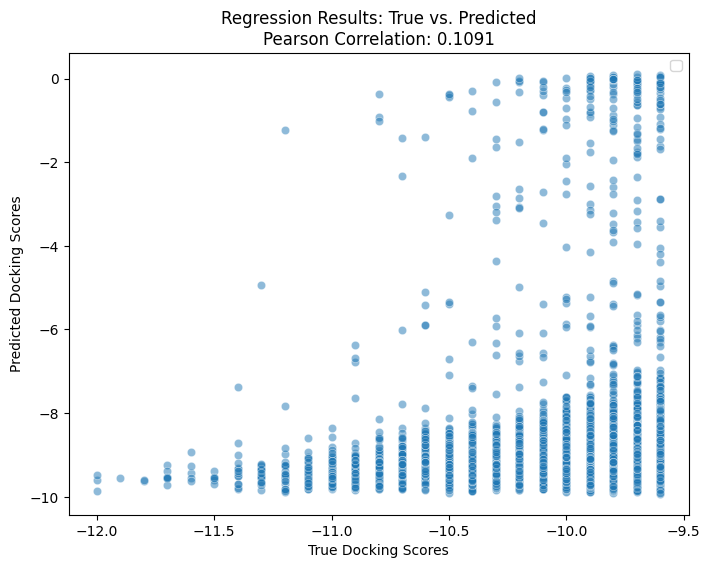

Pearson Correlation Coefficient: 0.1091


In [ ]:
true_top1pct_df = merged_df[merged_df.mpro_dockscores<=threshold]
print(true_top1pct_df.shape)
true_top1pct_dataset =  SMILESDataset(true_top1pct_df, tokenizer)
true_top1pct_dataloader = DataLoader(true_top1pct_dataset, batch_size=32, shuffle=True)
plot_predictions(model, true_top1pct_dataloader)
